In [68]:
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt

In [69]:
energy_consumption = pd.read_csv('global-energy-substitution.csv')
energy_consumption.head()

,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy)
0,World,OWID_WRL,1800,0,0,0,0,5556,0,0,0,97,0
1,World,OWID_WRL,1810,0,0,0,0,5833,0,0,0,128,0
2,World,OWID_WRL,1820,0,0,0,0,6111,0,0,0,153,0
3,World,OWID_WRL,1830,0,0,0,0,6389,0,0,0,264,0
4,World,OWID_WRL,1840,0,0,0,0,6944,0,0,0,356,0


In [70]:
energy_consumption.tail()

,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy)
67,World,OWID_WRL,2015,2104,50892,6516,9827,11111,1362,937,650,43844,34781
68,World,OWID_WRL,2016,2424,51920,6576,10092,11111,1378,970,825,43196,35589
69,World,OWID_WRL,2017,2852,52568,6596,10165,11111,1457,1012,1117,43360,36586
70,World,OWID_WRL,2018,3157,53181,6711,10368,11111,1529,1109,1448,44109,38517
71,World,OWID_WRL,2019,3540,53620,6923,10455,11111,1614,1143,1793,43849,39292


In [71]:
energy_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Entity                                        72 non-null     object
 1   Code                                          72 non-null     object
 2   Year                                          72 non-null     int64 
 3   Wind (TWh; substituted energy)                72 non-null     int64 
 4   Oil (TWh; substituted energy)                 72 non-null     int64 
 5   Nuclear (TWh; substituted energy)             72 non-null     int64 
 6   Hydropower (TWh; substituted energy)          72 non-null     int64 
 7   Traditional bimass (TWh; substituted energy)  72 non-null     int64 
 8   Other renewables (TWh; substituted energy)    72 non-null     int64 
 9   Biofuels (TWh; substituted energy)            72 non-null     int64 
 10  Sola

In [72]:
energy_consumption = energy_consumption.drop(['Entity', 'Code'], axis=1)
energy_consumption.columns = ['year', 'wind', 'oil', 'nuclear', 'hydro',
                              'biomass', 'other_renewables', 'biofuels',
                              'solar', 'coal', 'gas']
energy_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              72 non-null     int64
 1   wind              72 non-null     int64
 2   oil               72 non-null     int64
 3   nuclear           72 non-null     int64
 4   hydro             72 non-null     int64
 5   biomass           72 non-null     int64
 6   other_renewables  72 non-null     int64
 7   biofuels          72 non-null     int64
 8   solar             72 non-null     int64
 9   coal              72 non-null     int64
 10  gas               72 non-null     int64
dtypes: int64(11)
memory usage: 6.3 KB


In [73]:
energy_consumption = energy_consumption.set_index('year').sort_index(axis=0)

Ideias atuais:
 - Demonstrar os acontecimentos marcantes durante a história da humanidade e sua ligação com o consumo de energia
 - Mostrar que quanto mais a sociedade evolui, mais energia elétrica ela consome
 - Mostrar a relação dos combustíveis renováveis vs não renováveis (como uma barra de progresso)

In [74]:
energy_consumption['total'] = energy_consumption.sum(axis=1)
energy_consumption['renewable'] = energy_consumption[
    ['wind', 'hydro', 'biomass', 'biofuels', 'other_renewables', 'solar']].sum(axis=1)

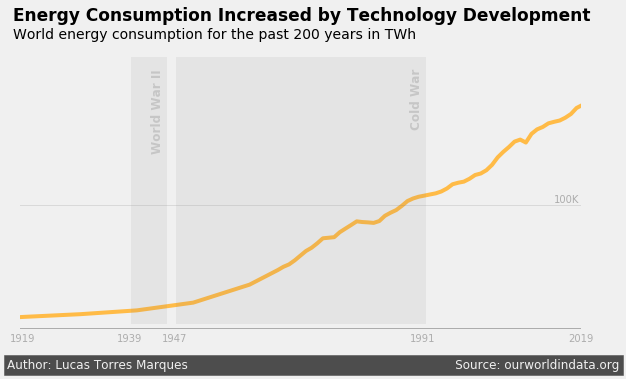

In [284]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(energy_consumption.index, energy_consumption['total'],
        color='#ffbb47')
ax.grid(False)
ax.set_xlim(1919, 2019)
ax.set_xticklabels([])
ax.set_yticklabels([])

# WWII and Cold War enclosures
ax.axhline(200000, xmin=0.2, xmax=0.263, color='grey', alpha=0.1, lw=510)
ax.text(1942.5, 140000, 'World War II', fontsize=12, weight='bold',
        color='grey', alpha=0.3, rotation=90)
ax.axhline(200000, xmin=0.28, xmax=0.723, color='grey', alpha=0.1, lw=510)
ax.text(1988.5, 157500, 'Cold War', fontsize=12, weight='bold',
        color='grey', alpha=0.3, rotation=90)

# X-axis
ax.axhline(10000, xmin=0, xmax=1, color='grey', alpha=0.6, lw=1)
ax.text(1917.5, 0, '1919', fontsize=10, color='grey', alpha=0.6)
ax.text(1936.5, 0, '1939', fontsize=10, color='grey', alpha=0.6)
ax.text(1944.5, 0, '1947', fontsize=10, color='grey', alpha=0.6)
ax.text(1988.5, 0, '1991', fontsize=10, color='grey', alpha=0.6)
ax.text(2016.5, 0, '2019', fontsize=10, color='grey', alpha=0.6)

# 100,000 TWh support line
ax.axhline(100000, xmin=0, xmax=1, color='grey', alpha=0.2, lw=1)
ax.text(2014, 101500, '100K', fontsize=10, color='grey', alpha=0.6)

# Title and subtitle
ax.text(1918,235000,"Energy Consumption Increased by Technology Development",
        size=17, weight='bold')
ax.text(1918,222000,"World energy consumption for the past 200 years in TWh")

# Credits
ax.text(1917, -20000, 'Author: Lucas Torres Marques' + ' '*69 + 'Source: ourworldindata.org',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=12)


plt.show()